In [1]:
from keras.models import load_model
import cv2
import numpy as np
from utils import *
import matplotlib.pyplot as plt

/home/popmusic/.virtualenvs/cv/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = load_model('my_model.h5')
#            desert, mounts, sea, sunset, trees
best_threshold = [0.65, 0.25, 0.37, 0.48, 0.69]

In [4]:
img = cv2.imread('../test_images/0.jpg')
img = cv2.resize(img, (100, 100))

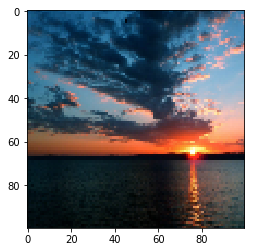

In [5]:
(b, g, r) = np.split(img, 3, axis=2)
show_img = np.concatenate((r, g, b), axis=2)
plt.imshow(show_img)
plt.show()

In [6]:
img = img / 255.
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 100, 100, 3)


In [7]:
pred = model.predict_proba(img)
print(pred)

[[0.22603117 0.50485104 0.02318065 0.2226785  0.20763813]]


In [8]:
y_pred = np.array([1 if pred[0, i] >= best_threshold[i] else 0 for i in range(num_classes)])
[class_labels[i] for i in range(num_classes) if y_pred[i] == 1]

['mountains']